# Exploratory Data Analysis and Cleaning

In [39]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Load data
my_spotify_data = pd.read_csv("data/my_spotify_data.csv", encoding='latin-1', low_memory=False)
tracks = pd.read_csv("data/tracks.csv")

#### 2.1 - my_spotify_data

In [41]:
my_spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328952 entries, 0 to 328951
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   track_name         323663 non-null  object
 1   artist_name        323658 non-null  object
 2   album_name         323657 non-null  object
 3   spotify_track_uri  323653 non-null  object
 4   skipped            49746 non-null   object
 5   date               328942 non-null  object
 6   time               328944 non-null  object
 7   min_played         328940 non-null  object
dtypes: object(8)
memory usage: 20.1+ MB


* drop spotify_track_uri, album_name, skipped, date, time, and min_played because I only need to know the songs that I have listened to.

In [42]:
my_spotify_data.drop(columns = ['album_name','spotify_track_uri','skipped','date','time','min_played'], inplace=True)

In [43]:
my_spotify_data.describe()

,track_name,artist_name
count,323663,323658
unique,29653,10475
top,Deja Vu,Drake
freq,573,7065


In [44]:
my_spotify_data.isnull().sum()

track_name     5289
artist_name    5294
dtype: int64

Number of null values is small enough to drop. 

In [45]:
my_spotify_data = my_spotify_data.dropna()
my_spotify_data.head()

,track_name,artist_name
0,Heaven - Originally Performed By DJ Sammy & Yanou,It's A Cover Up
2,I Can Do Anything,3OH!3
3,Sail,AWOLNATION
4,Remember the Name (feat. Styles of Beyond),Fort Minor
7,Mon Ange,Darius Denon


#### 2.2 - tracks

In [46]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [47]:
tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [48]:
tracks.describe(include='O')

,id,name,artists,id_artists,release_date
count,586672,586601,586672,586672,586672
unique,586672,446474,114030,115062,19700
top,35iwgR4jXetI318WEWsa1Q,Summertime,['Die drei ???'],['3meJIgRw7YleJrmbpbJK6S'],1998-01-01
freq,1,101,3856,3856,2893


* drop id and id_artists since id is unique for every row and id_artists is redundant with artists

In [49]:
tracks.drop(columns=['id','id_artists'],inplace=True)

In [50]:
tracks.isnull().sum()

name                71
popularity           0
duration_ms          0
explicit             0
artists              0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

We can drop the missing values in name since there are so little.

In [51]:
tracks = tracks.dropna()
tracks.head()

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Carve,6,126903,0,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


#### 2.3 - Combining my_spotify_data and tracks
We will merge these two datasets with track_name and artist_name on name and artist, respectively.

In [54]:
data.head(5) 

,track_name,artist_name,name,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
0,Sail,AWOLNATION,Sail,74,259093,0,2011-03-15,0.826,0.436,1,-9.583,1,0.0558,0.441,0.615,0.0964,0.272,119.051,4,AWOLNATION
1,Sail,AWOLNATION,Sail,74,259093,0,2011-03-15,0.826,0.436,1,-9.583,1,0.0558,0.441,0.615,0.0964,0.272,119.051,4,AWOLNATION
2,Sail,AWOLNATION,Sail,74,259093,0,2011-03-15,0.826,0.436,1,-9.583,1,0.0558,0.441,0.615,0.0964,0.272,119.051,4,AWOLNATION
3,Sail,AWOLNATION,Sail,74,259093,0,2011-03-15,0.826,0.436,1,-9.583,1,0.0558,0.441,0.615,0.0964,0.272,119.051,4,AWOLNATION
4,Sail,AWOLNATION,Sail,74,259093,0,2011-03-15,0.826,0.436,1,-9.583,1,0.0558,0.441,0.615,0.0964,0.272,119.051,4,AWOLNATION


In [55]:
data.duplicated().sum() 

294183

There are many duplicated values becuase my_spotify_data keeps track of how many times we have listened to a song. We want to keep the duplicate values to differentiate a normal song from a favorite song as our target variable.

#### 2.4 - Create Target Variable 

We need to create a target variable to predict. In our case, we would like to categorize a song as 'favorite' or 'not a favorite'. We will use the top 20% of number of times listened to a song as 'favorite' and the bottom 80% as 'not a favorite'. 

37.0

In [58]:
# function that creates 'favorite_song' column with 1 = True, 0 = False
def favorite_song(row):
    if row < 37.0:
        return 0
    else:
        return 1 

In [59]:
track_freq['favorite_song'] = track_freq['track_freq'].apply(lambda x: favorite_song(x))

In [60]:
track_freq['favorite_song'].value_counts()

favorite_song
0    6993
1    1771
Name: count, dtype: int64

We see that the target variable is largely imbalanced, and some upsampling may be required when feature engineering.
For now, we will join it back with the main dataset.

,track_name,artist_name,name,popularity,duration_ms,explicit,release_date,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist,track_freq,favorite_song
0,Sail,AWOLNATION,Sail,74,259093,0,2011-03-15,0.826,0.436,1,...,0.0558,0.441,0.615,0.0964,0.272,119.051,4,AWOLNATION,72,1
1,Sail,AWOLNATION,Sail,74,259093,0,2011-03-15,0.826,0.436,1,...,0.0558,0.441,0.615,0.0964,0.272,119.051,4,AWOLNATION,72,1
2,Sail,AWOLNATION,Sail,74,259093,0,2011-03-15,0.826,0.436,1,...,0.0558,0.441,0.615,0.0964,0.272,119.051,4,AWOLNATION,72,1
3,Sail,AWOLNATION,Sail,74,259093,0,2011-03-15,0.826,0.436,1,...,0.0558,0.441,0.615,0.0964,0.272,119.051,4,AWOLNATION,72,1
4,Sail,AWOLNATION,Sail,74,259093,0,2011-03-15,0.826,0.436,1,...,0.0558,0.441,0.615,0.0964,0.272,119.051,4,AWOLNATION,72,1


#### 2.5 - Cleaning Cont.

In [62]:
# how many duplicates?
data.duplicated().sum()

294183

In [63]:
# drop duplicates
data.drop_duplicates(subset=['track_name','artist_name'], inplace=True)

In [64]:
data = data.reset_index(drop=True)

In [65]:
data.columns

Index(['track_name', 'artist_name', 'name', 'popularity', 'duration_ms',
       'explicit', 'release_date', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'artist', 'track_freq',
       'favorite_song'],
      dtype='object')

In [66]:
# drop unneeded / redundant columns
data.drop(columns=['name','artist','track_freq'],inplace=True)

In [68]:
data.shape

(8764, 19)

In [67]:
data.head()

,track_name,artist_name,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,favorite_song
0,Sail,AWOLNATION,74,259093,0,2011-03-15,0.826,0.436,1,-9.583,1,0.0558,0.44100,0.615000,0.0964,0.272,119.051,4,1
1,Remember the Name (feat. Styles of Beyond),Fort Minor,67,230493,1,2005-11-15,0.688,0.835,8,-4.162,1,0.0911,0.05830,0.000003,0.0795,0.880,84.858,4,1
2,Around the World - Radio Edit [Radio Edit],Daft Punk,45,241467,0,1997-04-11,0.934,0.760,7,-5.549,1,0.1480,0.00417,0.906000,0.0656,0.864,121.302,4,0
3,Club Foot,Kasabian,62,214373,0,2004-01-30,0.238,0.919,0,-6.893,1,0.0816,0.02570,0.000023,0.0914,0.123,101.752,4,1
4,I Can't Hold Back,Survivor,54,238800,0,1984-01-01,0.509,0.681,4,-10.659,1,0.0306,0.49900,0.000054,0.1000,0.330,143.645,4,1


#### 2.6 - Univariate Analysis

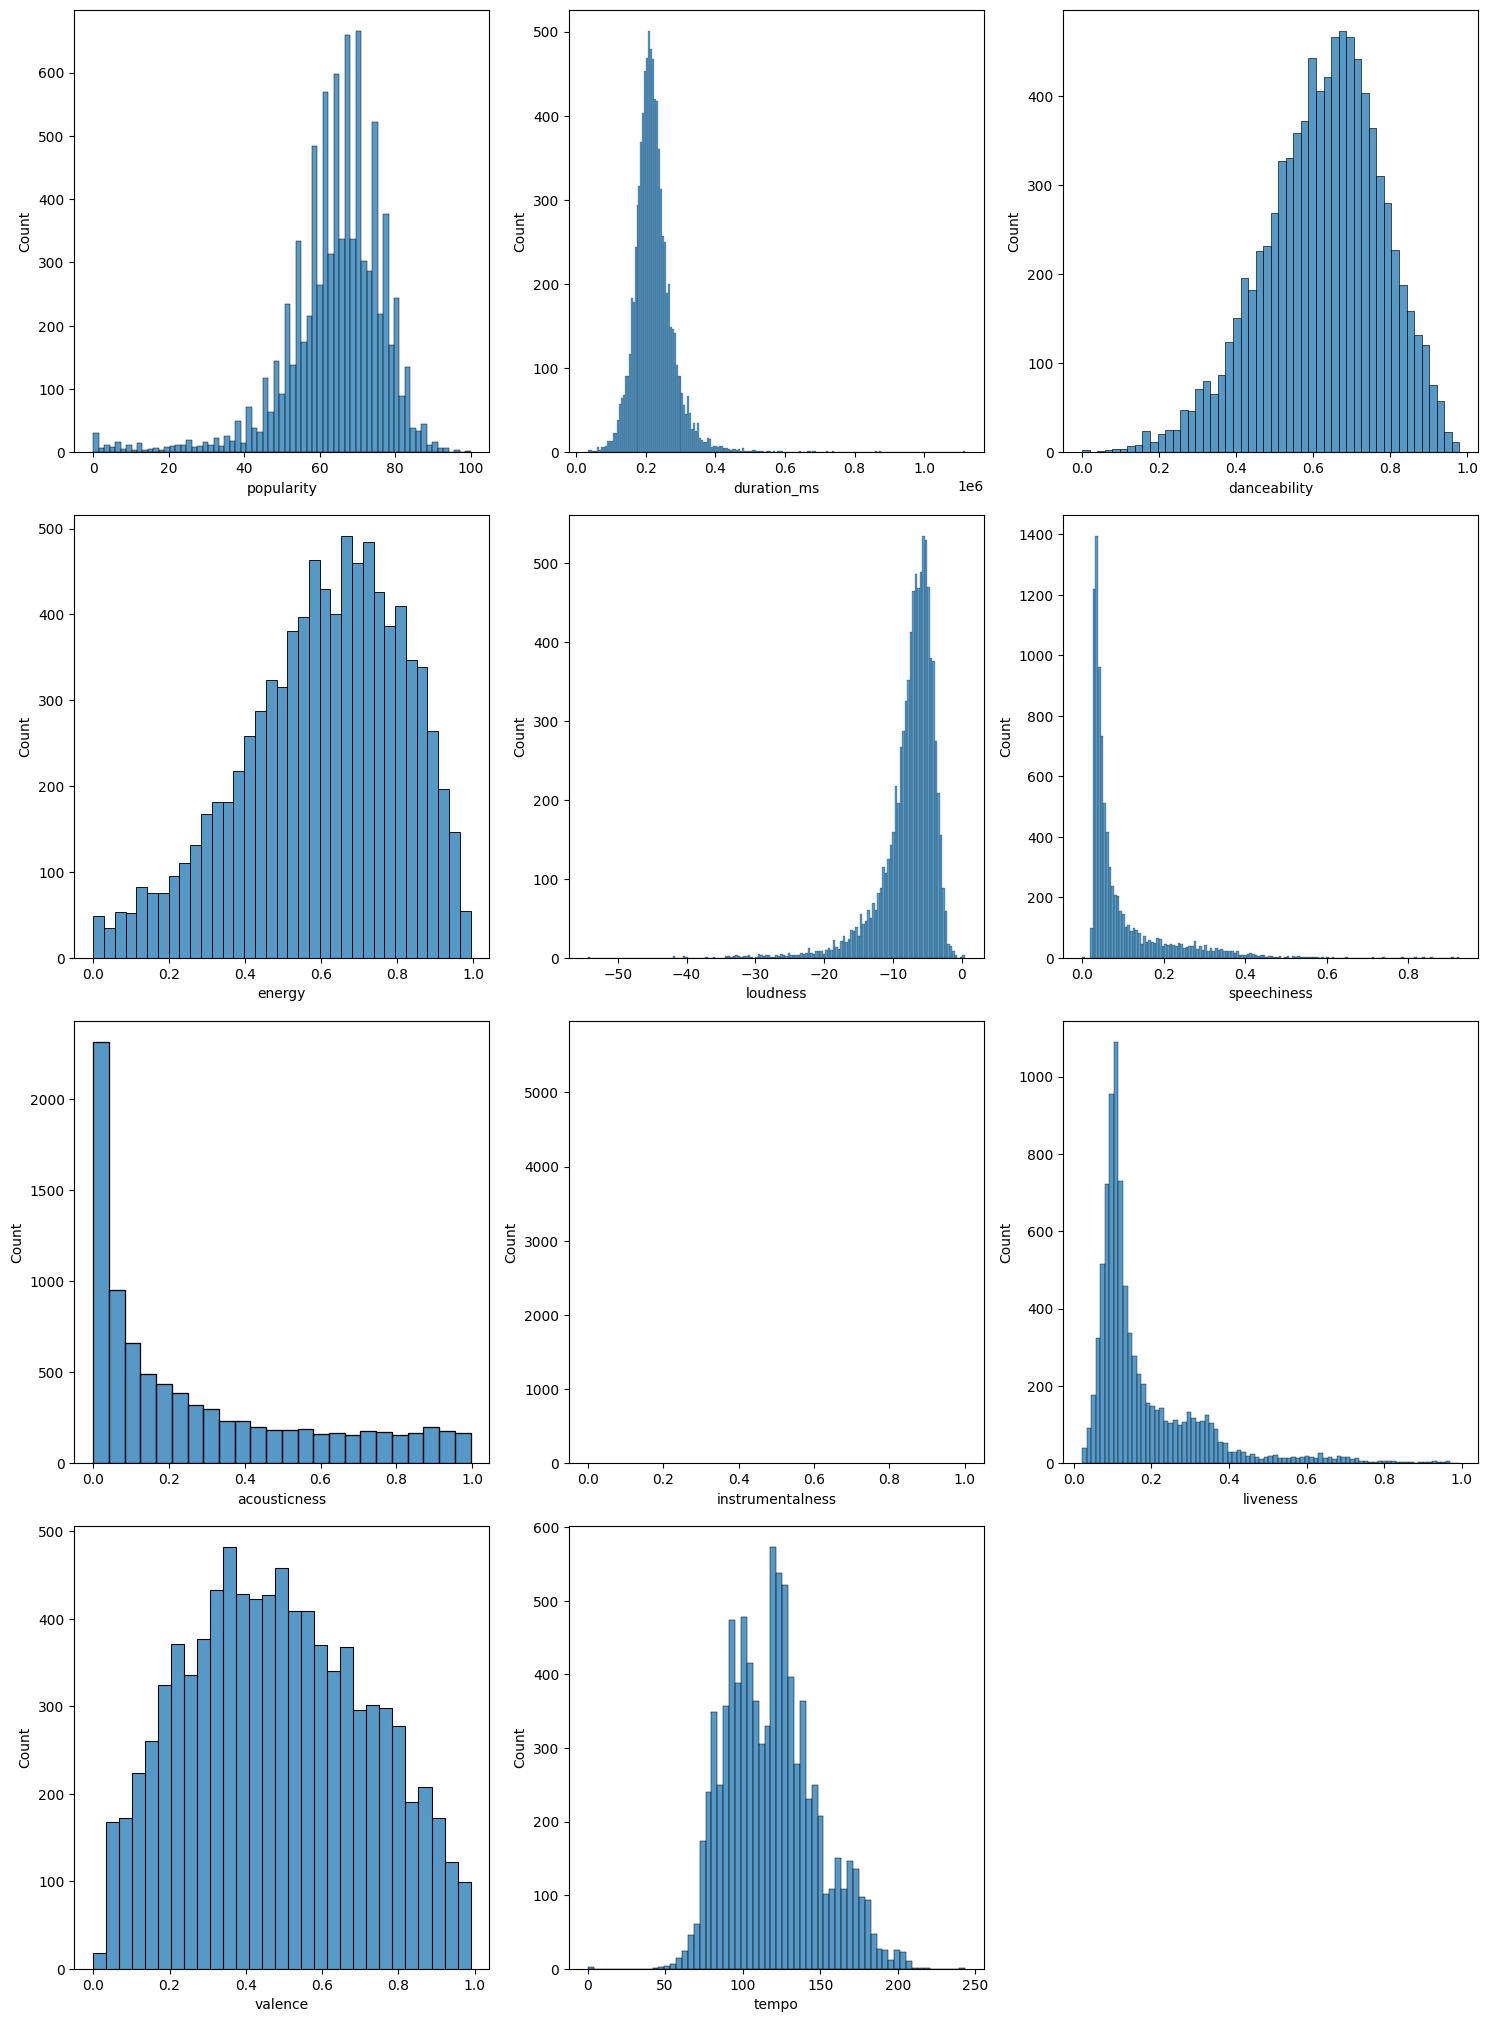

In [84]:
cols = 3
rows = 6
num_cols = data.select_dtypes(exclude='object').columns
num_cols = list(num_cols)
num_cols.remove('favorite_song')
num_cols.remove('mode')
num_cols.remove('explicit')
num_cols.remove('key')
num_cols.remove('time_signature')

fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax)
    
fig.tight_layout()  
plt.show()

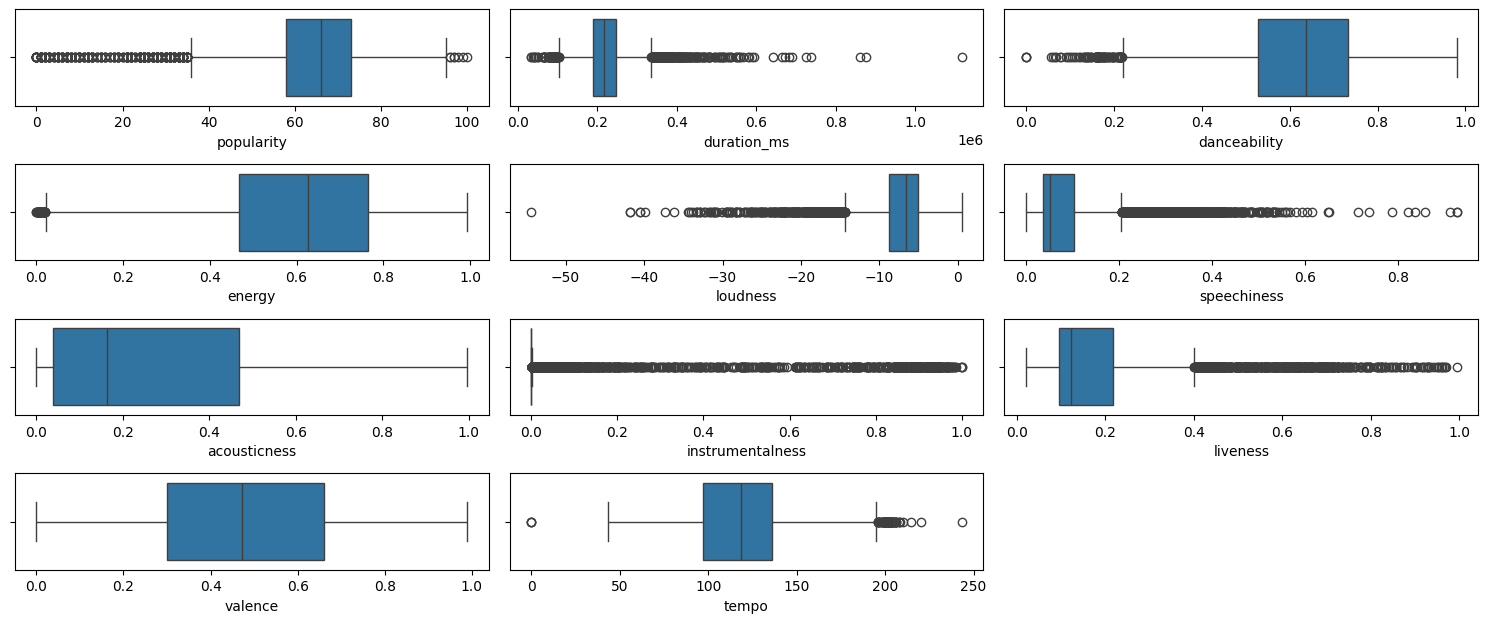

In [85]:
cols = 3
rows = 6
num_cols = data.select_dtypes(exclude='object').columns
num_cols = list(num_cols)
num_cols.remove('favorite_song')
num_cols.remove('mode')
num_cols.remove('explicit')
num_cols.remove('key')
num_cols.remove('time_signature')

fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=data[col], ax=ax)
    
fig.tight_layout()  
plt.show()